In [ ]:
#Imports

from selenium import webdriver
import pandas as pd
options=webdriver.ChromeOptions()
from webdriver_manager.chrome import ChromeDriverManager
import numpy as np
import datetime as datetime
import pandas_datareader as web
import matplotlib.pyplot as plt
import seaborn as sns
from selenium.webdriver.common.by import By

In [25]:
#define driver with ChromeDriverManager to avoid constant updates
driver = webdriver.Chrome(ChromeDriverManager().install())


In [28]:
#get the webpage that interests us
driver.get('https://www.youtube.com/@AlexTheAnalyst/videos')

In [29]:
#define the XPATHs, the elements on the page, that we will webscrape
chaine_titre=driver.find_elements(By.XPATH, '//*[@id="video-title"]')
chaine_vue=driver.find_elements(By.XPATH, '//*[@id="metadata-line"]/span[1]')
chaine_date=driver.find_elements(By.XPATH, '//*[@id="metadata-line"]/span[2]')

#create a list with all the elements 
videos=[]
for i in range(len(chaine_vue)):
    video_info={}
    video_info['title']=chaine_titre[i].text
    video_info['views']=chaine_vue[i].text
    video_info['date']=chaine_date[i].text

    videos.append(video_info)
videos

[{'title': 'State of AI in Analytics | Will AI be the End of Data Analysts?',
  'views': '11 k vues',
  'date': 'il y a 1 jour'},
 {'title': "Google Bard Got An Upgrade! + Google's New AI Announcements!",
  'views': '25 k vues',
  'date': 'il y a 4 jours'},
 {'title': 'Creating Visualizations using Pandas Library | Python Pandas Tutorials',
  'views': '10 k vues',
  'date': 'il y a 7 jours'},
 {'title': 'Merging DataFrames in Pandas | Python Pandas Tutorials',
  'views': '6,2 k vues',
  'date': 'il y a 2 semaines'},
 {'title': 'How to Integrate ChatGPT in Jupyter Notebooks for Free!',
  'views': '18 k vues',
  'date': 'il y a 3 semaines'},
 {'title': 'Google Business Intelligence Professional Certification Review',
  'views': '20 k vues',
  'date': 'il y a 4 semaines'},
 {'title': 'Google Advanced Data Analytics Professional Certificate First Look | Is it Worth it?',
  'views': '96 k vues',
  'date': 'il y a 1 mois'},
 {'title': 'Group By and Aggregate Functions in Pandas | Python Pand

In [30]:
#check the length of the list to be sure that we got all the elements that we wanted
len(videos)

30

In [31]:
#create a dataframe from that list and convert the different elements in the right format
df = pd.DataFrame(videos,columns=['title','views','date'])
df['views'] = df['views'].str.replace(',','.')
df['views'] = df['views'].str.replace(' k vues','')
df['views']=df['views'].apply(str)
df['views']=df['views'].apply(float)
df.dtypes

title     object
views    float64
date      object
dtype: object

In [32]:
#check the dataframe
df

,title,views,date
0,State of AI in Analytics | Will AI be the End ...,11.0,il y a 1 jour
1,Google Bard Got An Upgrade! + Google's New AI ...,25.0,il y a 4 jours
2,Creating Visualizations using Pandas Library |...,10.0,il y a 7 jours
3,Merging DataFrames in Pandas | Python Pandas T...,6.2,il y a 2 semaines
4,How to Integrate ChatGPT in Jupyter Notebooks ...,18.0,il y a 3 semaines
5,Google Business Intelligence Professional Cert...,20.0,il y a 4 semaines
6,Google Advanced Data Analytics Professional Ce...,96.0,il y a 1 mois
7,Group By and Aggregate Functions in Pandas | P...,6.6,il y a 1 mois
8,Top 5 Biggest Mistakes Beginner Data Analysts ...,28.0,il y a 1 mois
9,Indexes in Pandas | Python Pandas Tutorials,6.9,il y a 1 mois


In [33]:
#sort the dataframe with the 5 videos that got the most views in decreasing order (in terms of views)#
final=df.sort_values("views",ascending=False).iloc[:5,]

In [34]:
#check the final dataframe
final

,title,views,date
16,How to Become a Data Analyst in 2023 (Complete...,356.0,il y a 3 mois
14,ChatGPT for Data Analysts | Best Use Cases + A...,346.0,il y a 3 mois
15,FREE Data Analyst Bootcamp!!,290.0,il y a 3 mois
22,Why I Quit my 125k Analytics Job,132.0,il y a 4 mois
6,Google Advanced Data Analytics Professional Ce...,96.0,il y a 1 mois


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[None, None, None, None, None, None, None, None, None, None]

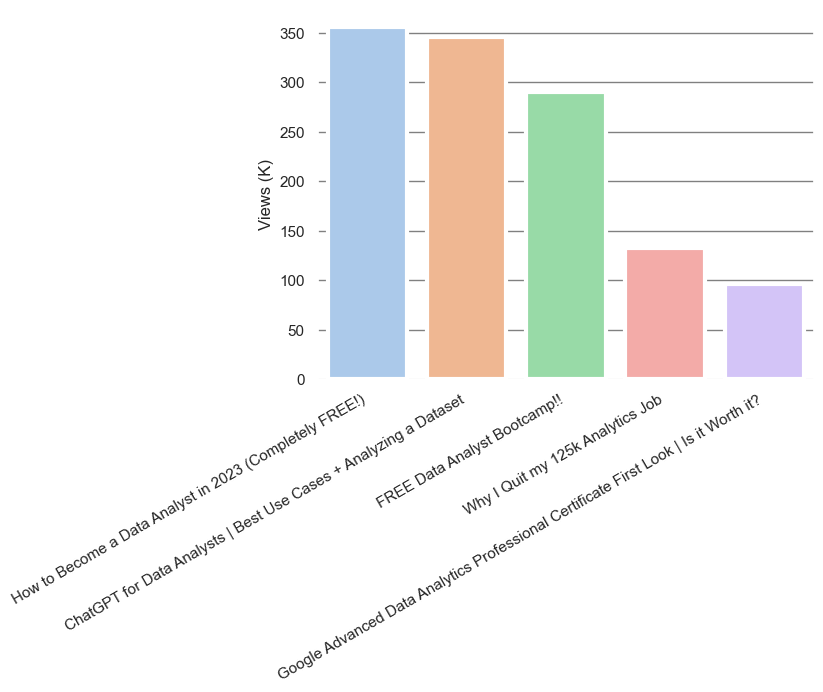

In [35]:
#create a barplot showing the five videos with the most views in decreasing order (in terms of views)#

sns.set_theme(palette='pastel')
ax = plt.axes()
ax.grid(True,color='grey')
ax.set_facecolor("white")
sns.barplot(final['title'], final['views'],lw=3)
plt.xlabel('')
plt.ylabel('Views (K)',fontsize=12)
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')


